In [397]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [398]:
from google.colab import drive
drive.mount('/content/drive')
csv_path = "/content/drive/MyDrive/Colab Notebooks/solar_weather - Raw - Assignment Oct 2025-1.csv"
df = pd.read_csv(csv_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-248474841.py:4: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


,Time,Energy Captured[Wh],Sun Light Intensity (W/m2),Temperature,1 Hour Rain Fall,Cloud Coverage,Length of Day_Light
0,1/1/2017 0:00,0,0,1.6,0,100,450
1,1/1/2017 0:15,0,0,1.6,0,100,450
2,1/1/2017 0:30,0,0,1.6,0,100,450
3,1/1/2017 0:45,0,0,1.6,0,100,450
4,1/1/2017 1:00,0,0,1.7,0,100,450


In [399]:
#Data types
print("Data Types:")
print(df.dtypes)
print("\nColumn names:")
print(df.columns.to_list())

Data Types:
Time                          object
Energy Captured[Wh]           object
Sun Light Intensity (W/m2)    object
Temperature                   object
1 Hour Rain Fall              object
Cloud Coverage                object
Length of Day_Light           object
dtype: object

Column names:
['Time', 'Energy Captured[Wh]', 'Sun Light Intensity (W/m2)', 'Temperature', '1 Hour Rain Fall', 'Cloud Coverage', 'Length of Day_Light']


In [400]:
#Converting to numeric values
df['Energy Captured[Wh]'] = pd.to_numeric(df['Energy Captured[Wh]'], errors='coerce')
df['Sun Light Intensity (W/m2)'] = pd.to_numeric(df['Sun Light Intensity (W/m2)'], errors='coerce')
df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')
df['1 Hour Rain Fall'] = pd.to_numeric(df['1 Hour Rain Fall'], errors='coerce')
df['Cloud Coverage'] = pd.to_numeric(df['Cloud Coverage'], errors='coerce')
df['Length of Day_Light'] = pd.to_numeric(df['Length of Day_Light'], errors='coerce')

print("New data types:")
print(df.dtypes)


New data types:
Time                           object
Energy Captured[Wh]           float64
Sun Light Intensity (W/m2)    float64
Temperature                   float64
1 Hour Rain Fall              float64
Cloud Coverage                float64
Length of Day_Light           float64
dtype: object


In [401]:
#Calculating (mean, median and standard deviation)Values
stats_data = {
    'Variable': ['Energy Captured[Wh]', 'Sun Light Intensity (W/m2)', 'Temperature',
                 '1 Hour Rain Fall', 'Cloud Coverage', 'Length of Day_Light'],

    'Mean': [df['Energy Captured[Wh]'].mean(), df['Sun Light Intensity (W/m2)'].mean(),
             df['Temperature'].mean(), df['1 Hour Rain Fall'].mean(),
             df['Cloud Coverage'].mean(), df['Length of Day_Light'].mean()],

    'Median': [df['Energy Captured[Wh]'].median(), df['Sun Light Intensity (W/m2)'].median(),
               df['Temperature'].median(), df['1 Hour Rain Fall'].median(),
               df['Cloud Coverage'].median(), df['Length of Day_Light'].median()],

    'Std_Dev': [df['Energy Captured[Wh]'].std(), df['Sun Light Intensity (W/m2)'].std(),
                df['Temperature'].std(), df['1 Hour Rain Fall'].std(),
                df['Cloud Coverage'].std(), df['Length of Day_Light'].std()]
}

stats_table = pd.DataFrame(stats_data)
print(stats_table.round(2))


                     Variable    Mean  Median  Std_Dev
0         Energy Captured[Wh]  573.01     0.0  1044.83
1  Sun Light Intensity (W/m2)   32.60     1.6    52.18
2                 Temperature    9.79     9.3     8.00
3            1 Hour Rain Fall    0.07     0.0     0.28
4              Cloud Coverage   65.97    82.0    36.64
5         Length of Day_Light  748.65   765.0   194.87


In [402]:
#Calculating Mode values
mode_data = {
    'Variable': ['Energy Captured[Wh]', 'Sun Light Intensity (W/m2)', 'Temperature',
                 '1 Hour Rain Fall', 'Cloud Coverage', 'Length of Day_Light'],
    'Mode': [df['Energy Captured[Wh]'].mode()[0], df['Sun Light Intensity (W/m2)'].mode()[0],
             df['Temperature'].mode()[0], df['1 Hour Rain Fall'].mode()[0],
             df['Cloud Coverage'].mode()[0], df['Length of Day_Light'].mode()[0]]
}
mode_table = pd.DataFrame(mode_data)
print("MODE VALUES")
print(mode_table)

print()
feature_cols = ['Sun Light Intensity (W/m2)','Temperature','1 Hour Rain Fall',
                'Cloud Coverage','Length of Day_Light']

#Checking NaNs
for col in feature_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    print(f"{col}: {df[col].isna().sum()} NaN → median {median_val}")
    print()


MODE VALUES
                     Variable    Mode
0         Energy Captured[Wh]     0.0
1  Sun Light Intensity (W/m2)     0.0
2                 Temperature     4.8
3            1 Hour Rain Fall     0.0
4              Cloud Coverage   100.0
5         Length of Day_Light  1020.0

Sun Light Intensity (W/m2): 0 NaN → median 1.6

Temperature: 0 NaN → median 9.3

1 Hour Rain Fall: 0 NaN → median 0.0

Cloud Coverage: 0 NaN → median 82.0

Length of Day_Light: 0 NaN → median 765.0



In [403]:
#Descriptive statistics Table
stats_cols = [
    "Energy Captured[Wh]",
    "Sun Light Intensity (W/m2)",
    "Temperature",
    "1 Hour Rain Fall",
    "Cloud Coverage",
    "Length of Day_Light",
]

num_df = df[stats_cols].copy()
desc = pd.DataFrame({
    "Mean": num_df.mean(),
    "Median": num_df.median(),
    "Mode": num_df.mode().iloc[0],
    "Std dev": num_df.std()
}).round(4)

print("DESCRIPTIVE STATISTICS TABLE")
desc.reset_index().rename(columns={"index": "Variable"})


DESCRIPTIVE STATISTICS TABLE


,Variable,Mean,Median,Mode,Std dev
0,Energy Captured[Wh],573.0113,0.0,0.0,1044.8324
1,Sun Light Intensity (W/m2),32.5973,1.6,0.0,52.1748
2,Temperature,9.7907,9.3,4.8,7.9953
3,1 Hour Rain Fall,0.0660,0.0,0.0,0.2789
4,Cloud Coverage,65.9719,82.0,100.0,36.6366
5,Length of Day_Light,748.6506,765.0,1020.0,194.8654


Selecting numeric data for correlation...
Shape of numeric data: (196777, 6)
   Energy Captured[Wh]  Sun Light Intensity (W/m2)  Temperature  \
0                  0.0                         0.0          1.6   
1                  0.0                         0.0          1.6   
2                  0.0                         0.0          1.6   
3                  0.0                         0.0          1.6   
4                  0.0                         0.0          1.7   

   1 Hour Rain Fall  Cloud Coverage  Length of Day_Light  
0               0.0           100.0                450.0  
1               0.0           100.0                450.0  
2               0.0           100.0                450.0  
3               0.0           100.0                450.0  
4               0.0           100.0                450.0  

Calculating correlation matrix...
Correlation matrix:
                            Energy Captured[Wh]  Sun Light Intensity (W/m2)  \
Energy Captured[Wh]             

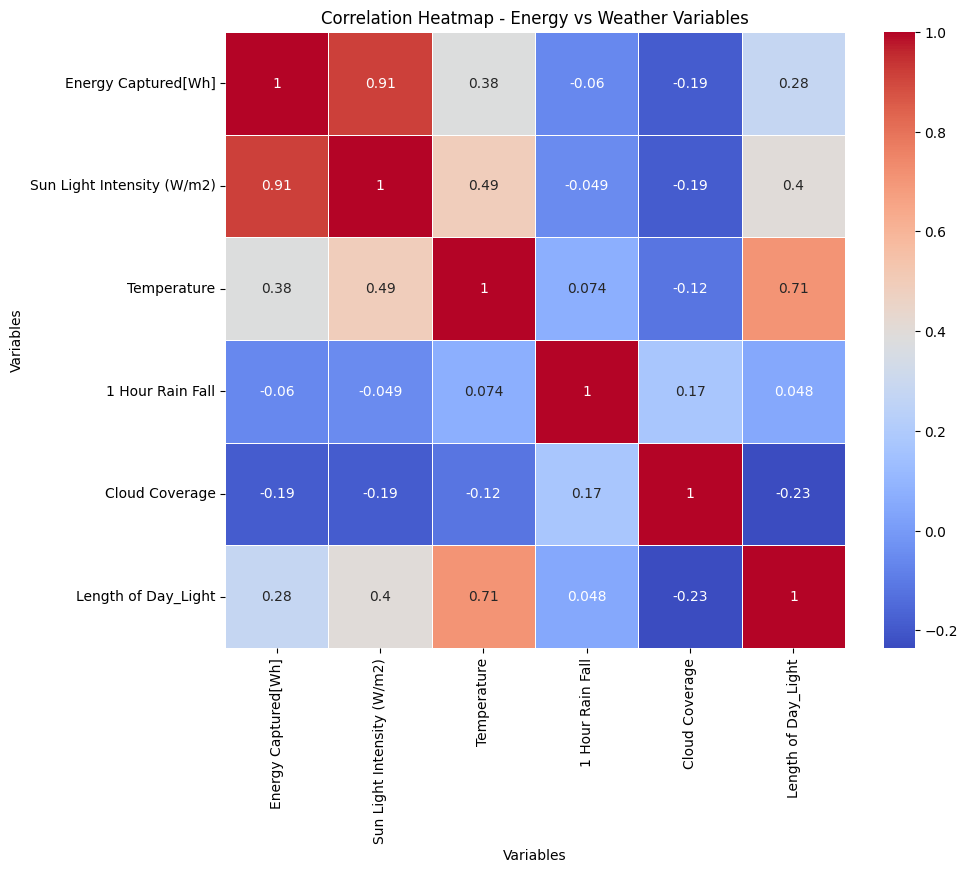

In [404]:
#Checking relationships
print("Selecting numeric data for correlation...")
numeric_data = df[['Energy Captured[Wh]','Sun Light Intensity (W/m2)','Temperature',
                   '1 Hour Rain Fall','Cloud Coverage','Length of Day_Light']]

print("Shape of numeric data:", numeric_data.shape)
print(numeric_data.head())

#Calculating Correlation matrix
print("\nCalculating correlation matrix...")
corr_matrix = numeric_data.corr()
print("Correlation matrix:")
print(corr_matrix.round(3))

#Plotting heatmap
print("Creating heatmap...")
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap - Energy vs Weather Variables")
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.show()

Creating frequency distribution charts
Each chart shows how data spreads


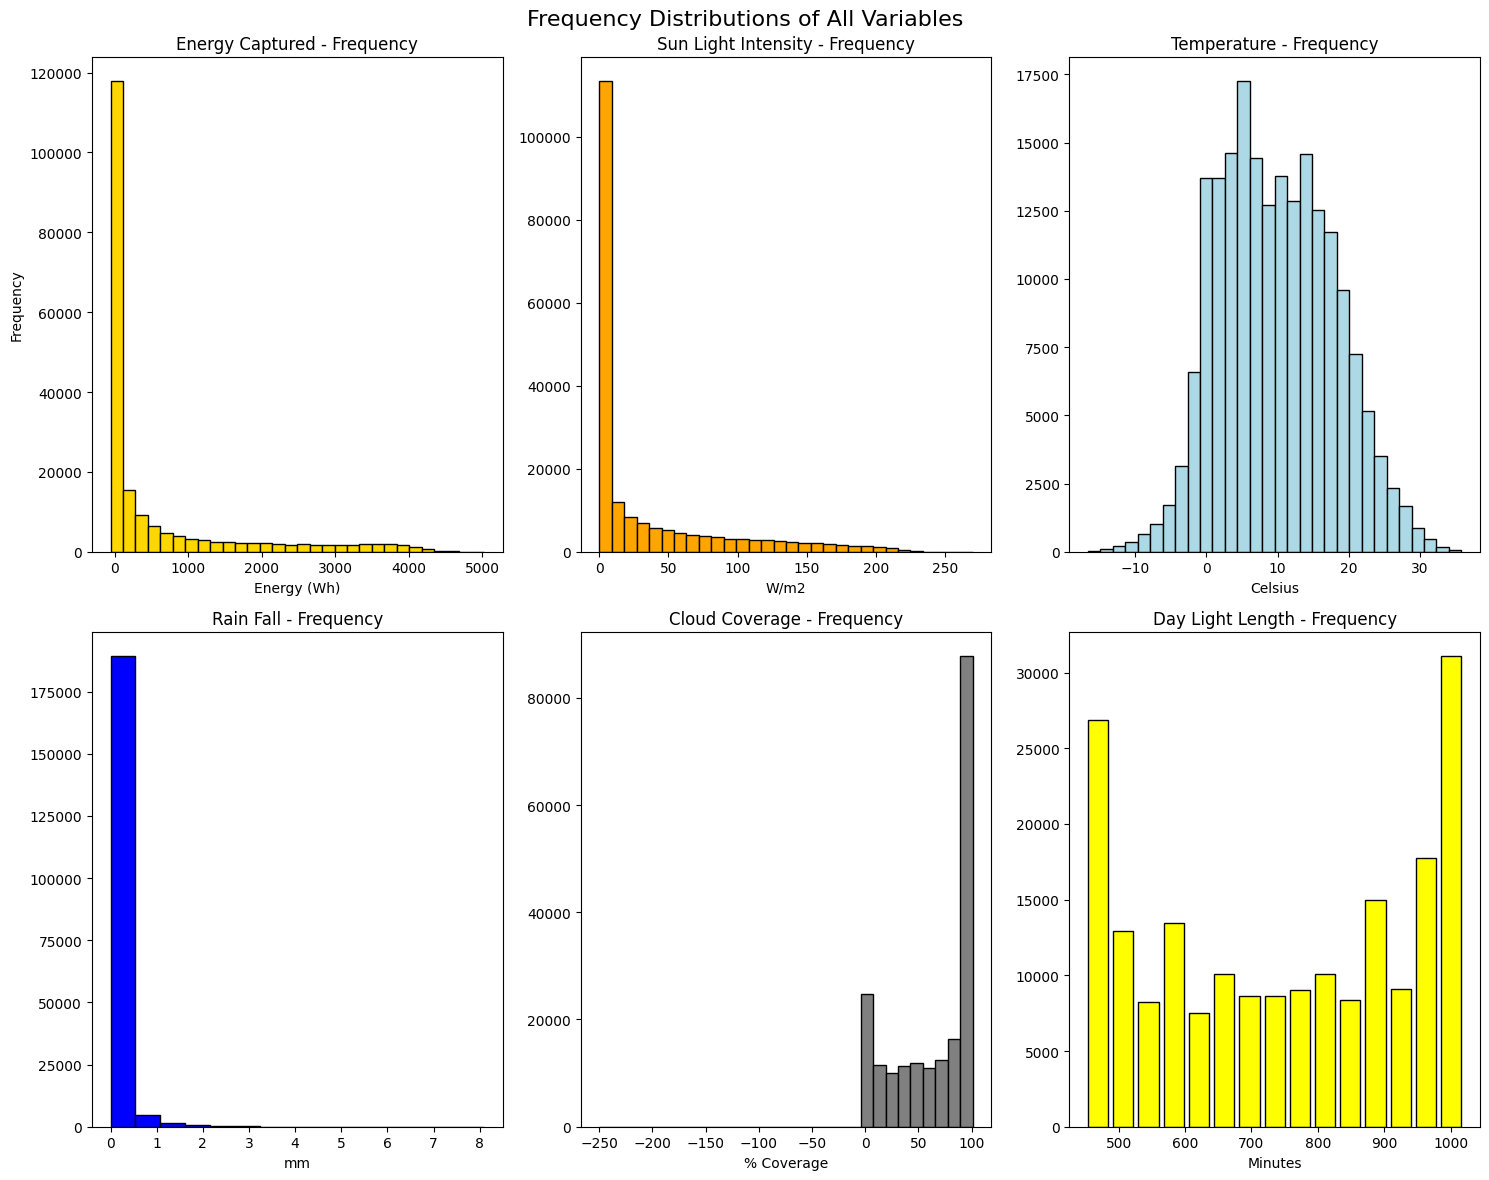

In [405]:
print("Creating frequency distribution charts")
print("Each chart shows how data spreads")

plt.figure(figsize=(15,12))

#Energy histogram
plt.subplot(2,3,1)
plt.hist(df['Energy Captured[Wh]'].dropna(), bins=30, edgecolor='black', color='gold')
plt.title('Energy Captured - Frequency')
plt.xlabel('Energy (Wh)')
plt.ylabel('Frequency')

#Sunlight histogram
plt.subplot(2,3,2)
plt.hist(df['Sun Light Intensity (W/m2)'].dropna(), bins=30, edgecolor='black', color='orange')
plt.title('Sun Light Intensity - Frequency')
plt.xlabel('W/m2')

#Temperature histogram
plt.subplot(2,3,3)
plt.hist(df['Temperature'].dropna(), bins=30, edgecolor='black', color='lightblue')
plt.title('Temperature - Frequency')
plt.xlabel('Celsius')

#Rain histogram
plt.subplot(2,3,4)
plt.hist(df['1 Hour Rain Fall'].dropna(), bins=15, edgecolor='black', color='blue')
plt.title('Rain Fall - Frequency')
plt.xlabel('mm')

#Cloud histogram
plt.subplot(2,3,5)
plt.hist(df['Cloud Coverage'].dropna(), bins=30, edgecolor='black', color='gray')
plt.title('Cloud Coverage - Frequency')
plt.xlabel('% Coverage')

#Daylight histogram
plt.subplot(2,3,6)
plt.hist(df['Length of Day_Light'].dropna(),
         bins=15, edgecolor='black', color='yellow', rwidth=0.8)  # rwidth<1 adds space [web:488]
plt.title('Day Light Length - Frequency')
plt.xlabel('Minutes')

plt.suptitle('Frequency Distributions of All Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [406]:
print("Checking for data problems...")

# Only the 6 variables from the assignment (edit if needed)
cols = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]
print("\nMissing values check")
print(df[cols].isnull().sum())
for col in cols:
    missing = df[col].isnull().sum()
    print()#space

    pct = (missing / len(df)) * 100
    print(f"{col} missing: {missing} rows ({pct:.2f}%)")
    print()

print("\nFirst 5 rows where Energy is missing:")
tmp = df[df['Energy Captured[Wh]'].isnull()][cols]
missing_rows = tmp.shape[0]
print(missing_rows)
print()
if missing_rows > 0:
    print(tmp.head())

Checking for data problems...

Missing values check
Energy Captured[Wh]           4
Sun Light Intensity (W/m2)    0
Temperature                   0
1 Hour Rain Fall              0
Cloud Coverage                0
Length of Day_Light           0
dtype: int64

Energy Captured[Wh] missing: 4 rows (0.00%)


Sun Light Intensity (W/m2) missing: 0 rows (0.00%)


Temperature missing: 0 rows (0.00%)


1 Hour Rain Fall missing: 0 rows (0.00%)


Cloud Coverage missing: 0 rows (0.00%)


Length of Day_Light missing: 0 rows (0.00%)


First 5 rows where Energy is missing:
4

       Energy Captured[Wh]  Sun Light Intensity (W/m2)  Temperature  \
493                    NaN                         0.0         -8.6   
539                    NaN                         4.2         -3.9   
778                    NaN                         0.0         -0.5   
36434                  NaN                        12.3          0.8   

       1 Hour Rain Fall  Cloud Coverage  Length of Day_Light  
493            

Next problem: OUTLIERS
Using boxplots to find unusual values


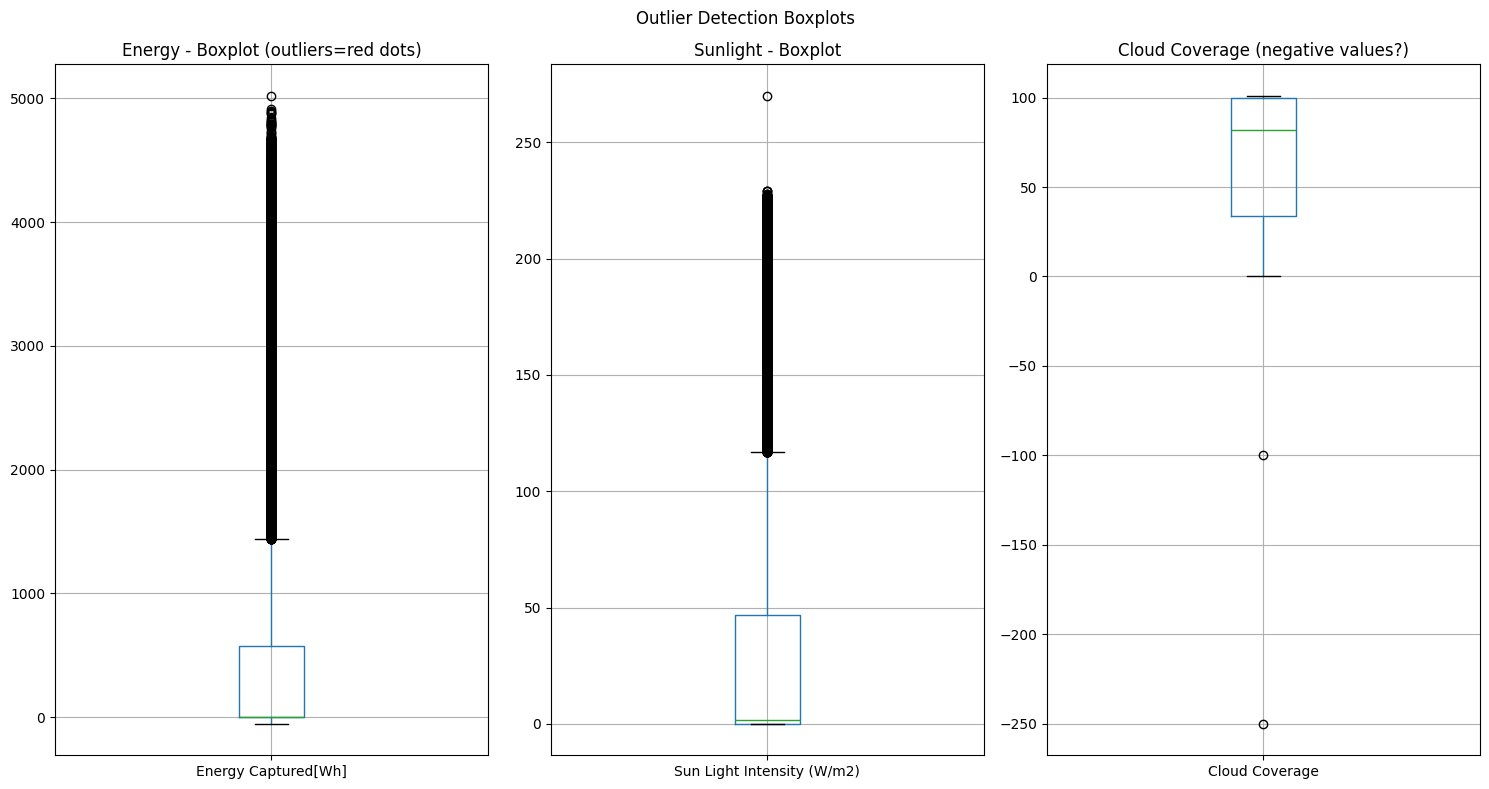


Energy negative values count:
Negative Energy: 1 (0.0005%)
Cloud negative count: 2 (0.0010%)
Cloud > 100 count: 1 (0.0005%)


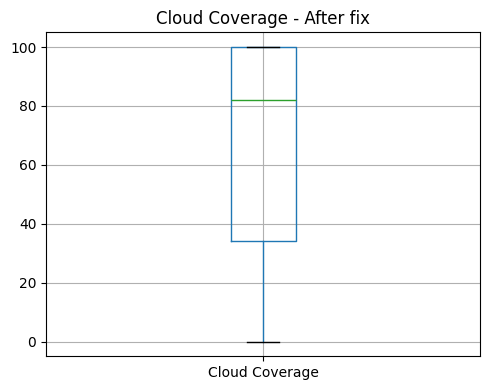

In [407]:
#Outliers (boxplots)

print("Next problem: OUTLIERS")
print("Using boxplots to find unusual values")

plt.figure(figsize=(15,8))

plt.subplot(1,3,1)
df.boxplot(column='Energy Captured[Wh]')
plt.title('Energy - Boxplot (outliers=red dots)')

plt.subplot(1,3,2)
df.boxplot(column='Sun Light Intensity (W/m2)')
plt.title('Sunlight - Boxplot')

plt.subplot(1,3,3)
df.boxplot(column='Cloud Coverage')
plt.title('Cloud Coverage (negative values?)')

plt.suptitle('Outlier Detection Boxplots')
plt.tight_layout()
plt.show()

#counts
n = len(df)
neg_energy = (df['Energy Captured[Wh]'] < 0).sum()
neg_cloud  = (df['Cloud Coverage'] < 0).sum()
over_cloud = (df['Cloud Coverage'] > 100).sum()

print("\nEnergy negative values count:")
print("Negative Energy:", neg_energy, f"({neg_energy/n:.4%})")
print("Cloud negative count:", neg_cloud, f"({neg_cloud/n:.4%})")
print("Cloud > 100 count:", over_cloud, f"({over_cloud/n:.4%})")

#Fix Cloud range
df['Cloud Coverage'] = df['Cloud Coverage'].clip(lower=0, upper=100) #keep within 0-100

#boxplot after handling
plt.figure(figsize=(5,4))
df.boxplot(column='Cloud Coverage')
plt.title('Cloud Coverage - After fix')
plt.tight_layout()
plt.show()

In [408]:
#Some outliers can be real events, invalid events like(eg cloud <0 or >100) should be fixed
print("OUTLIER ANALYSIS")
print("Checking outliers with the IQR method")

X_cols = [
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

n = len(df)

for col in X_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_pct = outlier_count / n * 100

    print(f"{col}: {outlier_count} outliers ({outlier_pct:.1f}%)")

OUTLIER ANALYSIS
Checking outliers with the IQR method
Sun Light Intensity (W/m2): 20348 outliers (10.3%)
Temperature: 140 outliers (0.1%)
1 Hour Rain Fall: 24968 outliers (12.7%)
Cloud Coverage: 0 outliers (0.0%)
Length of Day_Light: 0 outliers (0.0%)


In [409]:
print("Validity check")

cols = [
    'Energy Captured[Wh]',
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]

bad_energy = df['Energy Captured[Wh]'] < 0
bad_sun = df['Sun Light Intensity (W/m2)'] < 0
bad_rain = df['1 Hour Rain Fall'] < 0
bad_cloud = (df['Cloud Coverage'] < 0) | (df['Cloud Coverage'] > 100)

print(f"Negative Energy rows: {bad_energy.sum()}")
print(f"Negative Sunlight rows: {bad_sun.sum()}")
print(f"Negative Rainfall rows: {bad_rain.sum()}")
print(f"Cloud Coverage out of range (0-100) rows: {bad_cloud.sum()}")
print()

bad_any = bad_energy | bad_sun | bad_rain | bad_cloud

if bad_any.sum() == 0:
    print("No invalid rows found in these columns.")
else:
    print(df.loc[bad_any, cols].head())


Validity check
Negative Energy rows: 1
Negative Sunlight rows: 0
Negative Rainfall rows: 0
Cloud Coverage out of range (0-100) rows: 0

     Energy Captured[Wh]  Sun Light Intensity (W/m2)  Temperature  \
129                -54.0                         6.9          1.8   

     1 Hour Rain Fall  Cloud Coverage  Length of Day_Light  
129               0.0           100.0                450.0  


In [410]:
#Fixing negative values

print("Before fix - negative energy count:", (df['Energy Captured[Wh]'] < 0).sum())
df.loc[df['Energy Captured[Wh]'] < 0, 'Energy Captured[Wh]'] = 0
print("After fix:", (df['Energy Captured[Wh]'] < 0).sum())
print()

print("Before fix - negative cloud count:", (df['Cloud Coverage'] < 0).sum())
df.loc[df['Cloud Coverage'] < 0, 'Cloud Coverage'] = 0
print("After fix:", (df['Cloud Coverage'] < 0).sum())
print()

print("Missing Energy before:", df['Energy Captured[Wh]'].isnull().sum())
median_energy = df['Energy Captured[Wh]'].median()
df['Energy Captured[Wh]'] = df['Energy Captured[Wh]'].fillna(median_energy)
print("Missing Energy after:", df['Energy Captured[Wh]'].isnull().sum())
print("Used median:", median_energy)

Before fix - negative energy count: 1
After fix: 0

Before fix - negative cloud count: 0
After fix: 0

Missing Energy before: 4
Missing Energy after: 0
Used median: 0.0


In [411]:
print("Correlations with target variable")
print("Target = Energy Captured[Wh]")
print()  # space

features = [
    'Sun Light Intensity (W/m2)',
    'Temperature',
    '1 Hour Rain Fall',
    'Cloud Coverage',
    'Length of Day_Light'
]
target = 'Energy Captured[Wh]'

target_corr = df[features + [target]].corr(numeric_only=True)[target].drop(target)
print(f"Correlation with {target}:")
print(target_corr.sort_values(ascending=False).round(3).to_string())
print()

top_feat = target_corr.abs().idxmax()
top_val = target_corr[top_feat]

print("Observation:")
print(f"{top_feat} ({top_val:.3f}) is the strongest correlation with {target}.")

Correlations with target variable
Target = Energy Captured[Wh]

Correlation with Energy Captured[Wh]:
Sun Light Intensity (W/m2)    0.915
Temperature                   0.379
Length of Day_Light           0.281
1 Hour Rain Fall             -0.060
Cloud Coverage               -0.190

Observation:
Sun Light Intensity (W/m2) (0.915) is the strongest correlation with Energy Captured[Wh].


In [412]:
print("TASK 3 Step 2: Testing train/test split ratios")
print("Common ratios: 70/30, 80/20, 90/10\n")

from sklearn.model_selection import train_test_split

# Prepare data
X = df[['Sun Light Intensity (W/m2)','Temperature','1 Hour Rain Fall',
        'Cloud Coverage','Length of Day_Light']]  # Features
y = df['Energy Captured[Wh]']  # Target

# Test different splits
for test_size in [0.2, 0.3, 0.4]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    print(f"Test size {test_size}: Train={len(X_train)} rows, Test={len(X_test)} rows")
    print(f"Ratio: {len(X_train)/len(X):.0%} train, {test_size:.0%} test")
    print()


TASK 3 Step 2: Testing train/test split ratios
Common ratios: 70/30, 80/20, 90/10

Test size 0.2: Train=157421 rows, Test=39356 rows
Ratio: 80% train, 20% test

Test size 0.3: Train=137743 rows, Test=59034 rows
Ratio: 70% train, 30% test

Test size 0.4: Train=118066 rows, Test=78711 rows
Ratio: 60% train, 40% test



In [413]:
print("LINEAR REGRESSION MODEL")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error as mae


X = df[['Sun Light Intensity (W/m2)','Temperature','1 Hour Rain Fall',
        'Cloud Coverage','Length of Day_Light']]
y = df['Energy Captured[Wh]']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train: {len(X_train)} rows (80%)")
print(f"Test:  {len(X_test)} rows (20%)\n")

# Step 3: Train
model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained\n")

# Step 4:Test
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae_val = mae(y_test, y_pred)

print("RESULTS:")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae_val:.1f} Wh")


LINEAR REGRESSION MODEL
Train: 157421 rows (80%)
Test:  39356 rows (20%)

Model trained

RESULTS:
R²: 0.847
MAE: 242.0 Wh


In [414]:
print("RANDOM FOREST MODEL")
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error as mae

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_rf_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mae = mae(y_test, y_rf_pred)

print(f"Train: {len(X_train)} (80%)")
print(f"Test:  {len(X_test)} (20%)\n")

print("RANDOM FOREST RESULTS:")
print(f"R²: {rf_r2:.3f}")
print(f"MAE: {rf_mae:.1f} Wh")

RANDOM FOREST MODEL
Train: 157421 (80%)
Test:  39356 (20%)

RANDOM FOREST RESULTS:
R²: 0.914
MAE: 133.6 Wh


In [415]:
print("1. EVALUATION METRICS COMPARISON")
print("="*40)
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R²': [0.847, rf_r2],
    'MAE (Wh)': [242.0, rf_mae]
})
print(metrics.round(3))


1. EVALUATION METRICS COMPARISON
               Model     R²  MAE (Wh)
0  Linear Regression  0.847   242.000
1      Random Forest  0.914   133.573


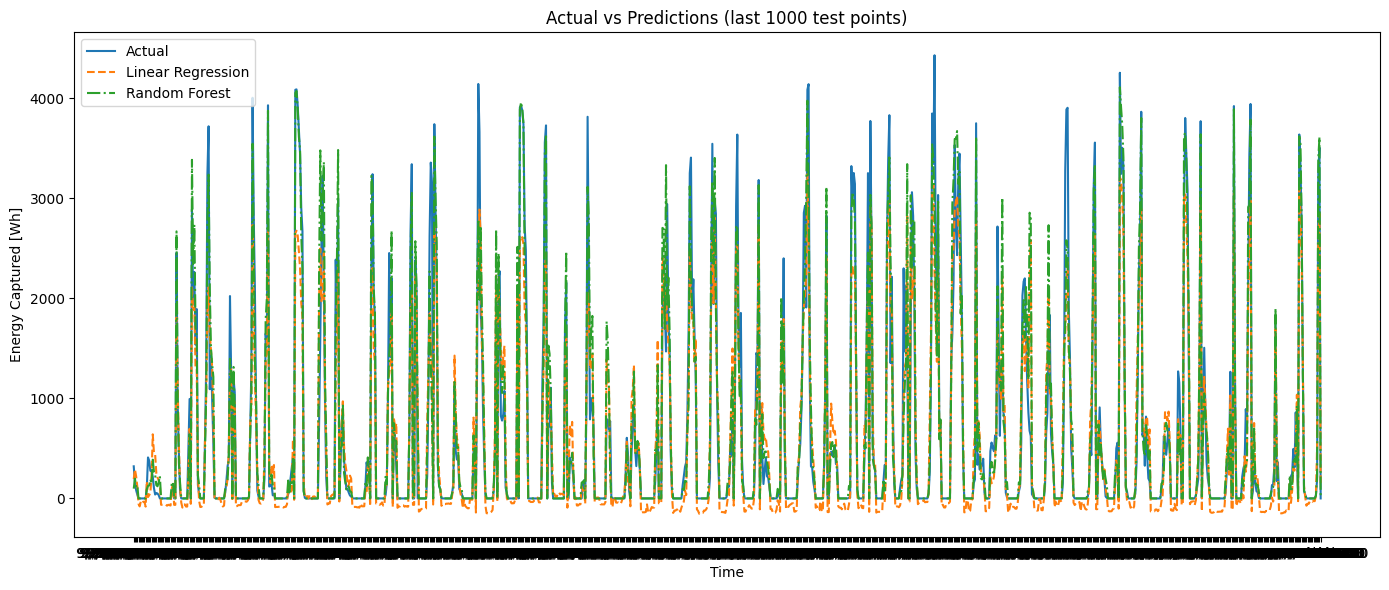

In [416]:
import matplotlib.pyplot as plt

# Recompute predictions using the CURRENT X_test
y_pred = model.predict(X_test)
y_rf_pred = rf_model.predict(X_test)

# Build plotting table (aligned by test indices)
plot_df = df.loc[y_test.index, ["Time"]].copy()
plot_df["Actual"]  = y_test.to_numpy()
plot_df["LR_Pred"] = y_pred
plot_df["RF_Pred"] = y_rf_pred

plot_df = plot_df.sort_values("Time").tail(1000)

plt.figure(figsize=(14, 6))
plt.plot(plot_df["Time"], plot_df["Actual"], label="Actual")
plt.plot(plot_df["Time"], plot_df["LR_Pred"], label="Linear Regression", linestyle="--")
plt.plot(plot_df["Time"], plot_df["RF_Pred"], label="Random Forest", linestyle="-.")
plt.title(f"Actual vs Predictions (last {len(plot_df)} test points)")
plt.xlabel("Time")
plt.ylabel("Energy Captured [Wh]")
plt.legend()
plt.tight_layout()
plt.show()



In [417]:
print("Train/Test split impact (time-based)")
print("-" * 45)

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

features = ['Sun Light Intensity (W/m2)', 'Temperature', '1 Hour Rain Fall',
            'Cloud Coverage', 'Length of Day_Light']
target = 'Energy Captured[Wh]'

df2 = df.copy()
df2['Time'] = pd.to_datetime(df2['Time'], errors='coerce')
df2 = df2.dropna(subset=['Time']).sort_values('Time')

X = df2[features]
y = df2[target]

test_sizes = [0.2, 0.3, 0.4]
rows = []

for ts in test_sizes:
    cut = int(len(df2) * (1 - ts))
    X_train, X_test = X.iloc[:cut], X.iloc[cut:]
    y_train, y_test = y.iloc[:cut], y.iloc[cut:]

    lr = LinearRegression().fit(X_train, y_train)
    rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

    pred_lr = lr.predict(X_test)
    pred_rf = rf.predict(X_test)

    rows.append([f"{int((1-ts)*100)}/{int(ts*100)}", "Linear Regression",
                 r2_score(y_test, pred_lr), mean_absolute_error(y_test, pred_lr)])
    rows.append([f"{int((1-ts)*100)}/{int(ts*100)}", "Random Forest",
                 r2_score(y_test, pred_rf), mean_absolute_error(y_test, pred_rf)])

results_df = pd.DataFrame(rows, columns=["Split", "Model", "R2", "MAE"])
print(results_df.sort_values(["Split", "Model"]).round(3))


Train/Test split impact (time-based)
---------------------------------------------
   Split              Model     R2      MAE
4  60/40  Linear Regression  0.830  259.203
5  60/40      Random Forest  0.884  155.551
2  70/30  Linear Regression  0.828  257.475
3  70/30      Random Forest  0.883  154.705
0  80/20  Linear Regression  0.824  261.625
1  80/20      Random Forest  0.881  158.243


In [418]:
#Make sure Time is datetime
df = df.copy()
df["Time"] = pd.to_datetime(df["Time"])
df["year"] = df["Time"].dt.year
df["month"] = df["Time"].dt.month

target_col = "Energy Captured[Wh]"
feature_cols = [
    "Sun Light Intensity (W/m2)",
    "Temperature",
    "1 Hour Rain Fall",
    "Cloud Coverage",
    "Length of Day_Light",
]

#Random Forest predictions for every row
df["pred_rf"] = rf_model.predict(df[feature_cols])

# Actual January is for 2017–2022..
jan = df[df["month"] == 1].copy()
jan_actual_means = jan.groupby("year")[target_col].mean()

#Predecting January 2026 forecast
jan_2026_forecast = float(jan["pred_rf"].mean())

#Creating single-row table
row = {
    "Jan 2017": round(jan_actual_means.get(2017, np.nan), 2),
    "Jan 2018": round(jan_actual_means.get(2018, np.nan), 2),
    "Jan 2019": round(jan_actual_means.get(2019, np.nan), 2),
    "Jan 2020": round(jan_actual_means.get(2020, np.nan), 2),
    "Jan 2021": round(jan_actual_means.get(2021, np.nan), 2),
    "Jan 2022": round(jan_actual_means.get(2022, np.nan), 2),
    "Jan 2026 (Forecast)": round(jan_2026_forecast, 2),
}
jan_table = pd.DataFrame([row])

print("\n REQUIRED COMPARISON TABLE (copy to report)")
print(jan_table.to_string(index=False))




 REQUIRED COMPARISON TABLE (copy to report)
 Jan 2017  Jan 2018  Jan 2019  Jan 2020  Jan 2021  Jan 2022  Jan 2026 (Forecast)
   180.25    125.36    117.25    122.45     83.17    161.14               130.44


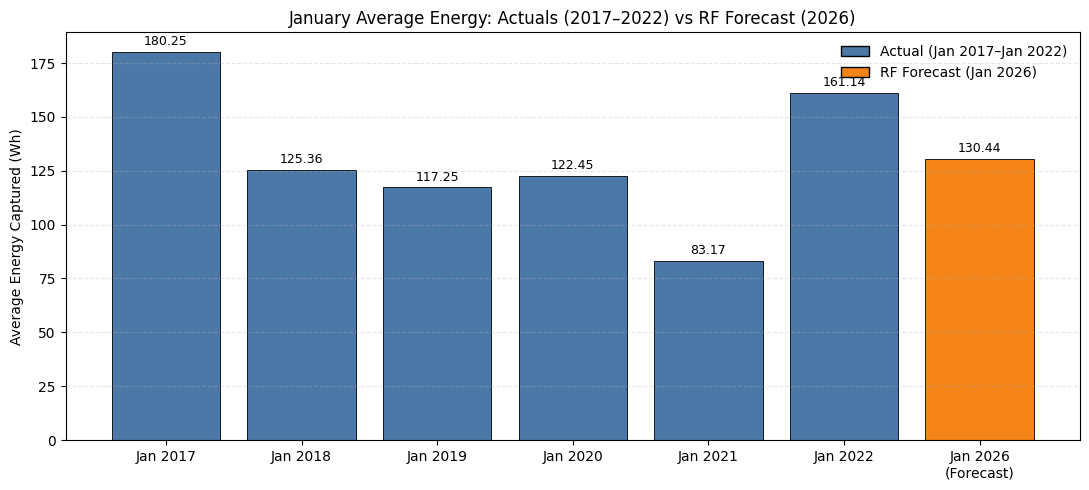

In [419]:
#Puting and labeling the bar
labels = ["Jan 2017","Jan 2018","Jan 2019","Jan 2020","Jan 2021","Jan 2022","Jan 2026\n(Forecast)"]
values = [round(jan_actual_means.get(2017, np.nan), 2),
          round(jan_actual_means.get(2018, np.nan), 2),
          round(jan_actual_means.get(2019, np.nan), 2),
          round(jan_actual_means.get(2020, np.nan), 2),
          round(jan_actual_means.get(2021, np.nan), 2),
          round(jan_actual_means.get(2022, np.nan), 2),
          round(jan_2026_forecast, 2),]

#Color for the forecast bar
colors = ["#4C78A8"] * 6 + ["#F58518"]

plt.figure(figsize=(11, 5))
bars = plt.bar(labels, values, color=colors, edgecolor="black", linewidth=0.6)

plt.title("January Average Energy: Actuals (2017–2022) vs RF Forecast (2026)")
plt.ylabel("Average Energy Captured (Wh)")
plt.grid(axis="y", linestyle="--", alpha=0.3)
plt.xticks(rotation=0)

#Adding value labels on top of bars
for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h + max(values)*0.01, f"{h:.2f}",
             ha="center", va="bottom", fontsize=9)

#Simple legend
from matplotlib.patches import Patch
legend_handles = [
    Patch(facecolor="#4C78A8", edgecolor="black", label="Actual (Jan 2017–Jan 2022)"),
    Patch(facecolor="#F58518", edgecolor="black", label="RF Forecast (Jan 2026)"),
]
plt.legend(handles=legend_handles, frameon=False, loc="upper right")

plt.tight_layout()
plt.show()
